In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import time
from time import sleep
from random import randint
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
def parse_html(html):
    data, item = pd.DataFrame(), {}
    soup = BeautifulSoup(html, 'lxml')
    for i, resto in enumerate(soup.find_all('div', class_='location-meta-block')):
        
        name = str(resto.find('div',class_='result-title'))
        item['name'] = BeautifulSoup(name,"lxml").get_text()     
        
        number_reviews = str(resto.find('a',class_='review_count'))
        item['number_reviews'] = BeautifulSoup(number_reviews,"lxml").get_text()
        
        address = str(resto.find('div',class_='address'))
        item['address'] = BeautifulSoup(address,"lxml").get_text()
        
        rating = resto.select('.rating-review-count .ui_bubble_rating')
        item['rating'] = rating[0]['alt']
        data[i] = pd.Series(item)
    return data.T

In [3]:
restaurants = pd.DataFrame()
driver = webdriver.Chrome()
driver.maximize_window()

for i in range(0,991,30): #991
    url = f'https://www.tripadvisor.es/Search?q=Barcelona&searchSessionId=51C8E5CE54DA772C3953CD9DA7D126D31646914148673ssid&searchNearby=false&sid=6CE36F5C961D4332A3DC16D3040AA0ED1646914152244&blockRedirect=true&ssrc=e&rf=36&o={i}'
    driver.get(url)
    x = randint(2,6)
    sleep(x)
    new_data = parse_html(driver.page_source)
    restaurants = pd.concat([restaurants, new_data], ignore_index=True)
    print(len(restaurants))

driver.close()
restaurants

30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020


,name,number_reviews,address,rating
0,Barcelona Tapas Puerto Vallarta,2.429 opiniones,"Calle Matamoros 906, Puerto Vallarta, MéxicoCa...","4,5 de 5 burbujas"
1,BelleBuon,2.957 opiniones,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5 de 5 burbujas
2,Fàbrica Moritz Barcelona,2.887 opiniones,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4 de 5 burbujas
3,Ciudad Condal,10.183 opiniones,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...","4,5 de 5 burbujas"
4,La Peninsular,2.875 opiniones,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...","4,5 de 5 burbujas"
...,...,...,...,...
1015,GOLIARD,320 opiniones,"Carrer PROGRES, 6, Barcelona, Cataluña, España...","4,5 de 5 burbujas"
1016,Locavore Barcelona,126 opiniones,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5 de 5 burbujas
1017,Cal Marius 449 #pastrami,249 opiniones,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4 de 5 burbujas
1018,The Box,1.085 opiniones,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...","4,5 de 5 burbujas"


In [4]:
restaurants['rating']=restaurants['rating'].str.replace(' de 5 burbujas', '')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace(' opiniones', '')

In [5]:
restaurants['rating']=restaurants['rating'].str.replace(',', '.')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace('.', '')
restaurants['rating'] = restaurants['rating'].astype(float)
restaurants['number_reviews'] = restaurants['number_reviews'].astype(int)

In [6]:
restaurants

,name,number_reviews,address,rating
0,Barcelona Tapas Puerto Vallarta,2429,"Calle Matamoros 906, Puerto Vallarta, MéxicoCa...",4.5
1,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
2,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
3,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
4,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
...,...,...,...,...
1015,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
1016,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
1017,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
1018,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [7]:
restaurants = restaurants.drop_duplicates()
restaurants

,name,number_reviews,address,rating
0,Barcelona Tapas Puerto Vallarta,2429,"Calle Matamoros 906, Puerto Vallarta, MéxicoCa...",4.5
1,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
2,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
3,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
4,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
...,...,...,...,...
1015,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
1016,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
1017,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
1018,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [8]:
rest=restaurants

In [9]:
rest=rest[rest['address'].str.contains('Barcelona')]
rest

,name,number_reviews,address,rating
1,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
2,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
3,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
4,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
5,La Patsa Lab,1758,"Calle Casanova 94, Barcelona, Cataluña, España...",5.0
...,...,...,...,...
1015,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
1016,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
1017,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
1018,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [10]:
rest.reset_index(drop=True, inplace=True)
rest

,name,number_reviews,address,rating
0,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
1,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
2,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
3,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
4,La Patsa Lab,1758,"Calle Casanova 94, Barcelona, Cataluña, España...",5.0
...,...,...,...,...
984,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
985,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
986,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
987,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [11]:
def extract_street (s):
    return s.split(',')[0]

rest['street']=rest['address'].apply(extract_street)

In [12]:
def extract_number (s):
    return s.split(',')[1]

rest['number']=rest['address'].apply(extract_number)

In [13]:
rest

,name,number_reviews,address,rating,street,number
0,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0,Travessera de Gràcia 441,Barcelona
1,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0,Ronda Sant Antoni 41,Barcelona
2,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5,Rambla de Catalunya,18
3,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5,Carrer Del Mar,29
4,La Patsa Lab,1758,"Calle Casanova 94, Barcelona, Cataluña, España...",5.0,Calle Casanova 94,Barcelona
...,...,...,...,...,...,...
984,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5,Carrer PROGRES,6
985,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0,Carrer D'aribau,151
986,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0,Mallorca,449
987,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5,Carrer D'en Gignas 30,Barcelona


In [14]:
rest['street'] = rest['street'] + rest['number']

In [15]:
rest

,name,number_reviews,address,rating,street,number
0,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0,Travessera de Gràcia 441 Barcelona,Barcelona
1,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0,Ronda Sant Antoni 41 Barcelona,Barcelona
2,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5,Rambla de Catalunya 18,18
3,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5,Carrer Del Mar 29,29
4,La Patsa Lab,1758,"Calle Casanova 94, Barcelona, Cataluña, España...",5.0,Calle Casanova 94 Barcelona,Barcelona
...,...,...,...,...,...,...
984,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5,Carrer PROGRES 6,6
985,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0,Carrer D'aribau 151,151
986,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0,Mallorca 449,449
987,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5,Carrer D'en Gignas 30 Barcelona,Barcelona


In [16]:
rest['street']=rest['street'].str.replace('Barcelona', '')

In [17]:
rest

,name,number_reviews,address,rating,street,number
0,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0,Travessera de Gràcia 441,Barcelona
1,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0,Ronda Sant Antoni 41,Barcelona
2,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5,Rambla de Catalunya 18,18
3,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5,Carrer Del Mar 29,29
4,La Patsa Lab,1758,"Calle Casanova 94, Barcelona, Cataluña, España...",5.0,Calle Casanova 94,Barcelona
...,...,...,...,...,...,...
984,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5,Carrer PROGRES 6,6
985,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0,Carrer D'aribau 151,151
986,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0,Mallorca 449,449
987,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5,Carrer D'en Gignas 30,Barcelona


In [18]:
rest.drop(['number','address'], axis = 1, inplace = True)
rest.rename(columns = {'street':'address'}, inplace = True)
rest['city']='Barcelona'
rest

,name,number_reviews,rating,address,city
0,BelleBuon,2957,5.0,Travessera de Gràcia 441,Barcelona
1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41,Barcelona
2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18,Barcelona
3,La Peninsular,2875,4.5,Carrer Del Mar 29,Barcelona
4,La Patsa Lab,1758,5.0,Calle Casanova 94,Barcelona
...,...,...,...,...,...
984,GOLIARD,320,4.5,Carrer PROGRES 6,Barcelona
985,Locavore Barcelona,126,5.0,Carrer D'aribau 151,Barcelona
986,Cal Marius 449 #pastrami,249,4.0,Mallorca 449,Barcelona
987,The Box,1085,4.5,Carrer D'en Gignas 30,Barcelona


In [19]:
rest['address']=rest['address'].str.replace('C/', 'Carrer ')
rest['address']=rest['address'].str.replace('c/', 'Carrer ')
rest['address']=rest['address'].str.replace('Calle', 'Carrer ')
rest['address']=rest['address'].str.replace('calle', 'Carrer ')
rest['address']=rest['address'].str.replace('74b', '74')
rest['address']=rest['address'].str.replace('Carreer','Carrer ')
rest['address']=rest['address'].str.replace('Christina ','Cristina  ')
rest['address']=rest['address'].str.replace('[^\w\s]', ' ')

In [23]:
rest

,name,number_reviews,rating,address,city
0,BelleBuon,2957,5.0,Travessera de Gràcia 441,Barcelona
1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41,Barcelona
2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18,Barcelona
3,La Peninsular,2875,4.5,Carrer Del Mar 29,Barcelona
4,La Patsa Lab,1758,5.0,Carrer Casanova 94,Barcelona
...,...,...,...,...,...
984,GOLIARD,320,4.5,Carrer PROGRES 6,Barcelona
985,Locavore Barcelona,126,5.0,Carrer D aribau 151,Barcelona
986,Cal Marius 449 #pastrami,249,4.0,Mallorca 449,Barcelona
987,The Box,1085,4.5,Carrer D en Gignas 30,Barcelona


In [24]:
rest['address']=rest['address']+' '+rest['city']

In [25]:
from geopy import Nominatim
from geopy.geocoders import Nominatim
import time

In [27]:
%%timeit
# from geopy.extra.rate_limiter import RateLimiter

#Creating an instance of Nominatim Class
geolocator = Nominatim(timeout=10, user_agent="sergiguasch83@gmail.com")

geocode = geolocator.geocode
 
#Applying the method to pandas DataFrame
rest['location'] = rest['address'].apply(geocode)
rest['lat'] = rest['location'].apply(lambda x: x.latitude if x else None)
rest['long'] = rest['location'].apply(lambda x: x.longitude if x else None)

In [28]:
# geolocator = Nominatim(timeout=10, user_agent = "SergiGuasch83@gmail.com")
# lat = []
# long = []
# index = -1

# for i in rest['address']:
#     location = geolocator.geocode(i, timeout=10)
#     index+=1
#     print(index)
#     if location is None:
#         lat.append(None)
#         long.append(None)
#     else:
#         latitude = location.latitude
#         longitude = location.longitude  
    
#     lat.append(latitude)
#     long.append(longitude)

In [29]:
# len(lat), len(long)

In [30]:
# rest['lat'] = pd.DataFrame(lat,columns=['lat'])
# rest['long'] = pd.DataFrame(long,columns=['long'])

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
rest

,name,number_reviews,rating,address,city,location,lat,long
0,BelleBuon,2957,5.0,Travessera de Gràcia 441 Barcelona,Barcelona,"(441, Travessera de Gràcia, el Camp d'en Grass...",41.411243,2.172947
1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41 Barcelona,Barcelona,"(Fábrica Moritz Barcelona, 41, Ronda de Sant A...",41.382567,2.163397
2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,"(Ciudad Condal, 18, Rambla de Catalunya, Eixam...",41.388800,2.166890
3,La Peninsular,2875,4.5,Carrer Del Mar 29 Barcelona,Barcelona,"(Bodega La Peninsular, 29, Carrer del Mar, la ...",41.380359,2.187872
4,La Patsa Lab,1758,5.0,Carrer Casanova 94 Barcelona,Barcelona,"(La Patsa Lab, 94, Carrer de Casanova, l'Antig...",41.386981,2.156921
5,Bella Italia,1384,5.0,Carrer de Roger de Lluria 87 Barcelona,Barcelona,"(El teu lloc, 87, Carrer de Roger de Llúria, l...",41.395029,2.166052
6,Thai Barcelona | Royal Cuisine,1654,4.0,Diputació 273 Barcelona,Barcelona,"(Diputació, Puigdàlber, Alt Penedès, Barcelona...",41.403974,1.699434
7,Ramen-ya Hiro,1212,4.5,Carrer Girona 164 Barcelona,Barcelona,"(Carrer Girona, Vilalba Sasserra, Vallès Orien...",41.653875,2.444301
8,Le Romane,2205,5.0,Carrer Muntaner 103 Barcelona,Barcelona,"(Le Romane, 103, Carrer de Muntaner, l'Antiga ...",41.388797,2.156331
9,Cervecería Catalana,12767,4.5,Carrer de Mallorca 236 Barcelona,Barcelona,"(Cervecería Catalana, 236, Carrer de Mallorca,...",41.392403,2.160901


In [33]:
rest.drop(['location'], axis = 1, inplace = True)

In [51]:
rest.to_csv('restaurants.csv',encoding='utf-8-sig')

In [23]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [24]:
rest=pd.read_csv('restaurants.csv')

In [25]:
gdf = geopandas.GeoDataFrame(rest, geometry=geopandas.points_from_xy(rest['long'], rest['lat']))

In [26]:
gdf

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
0,0,BelleBuon,2957,5.0,Travessera de Gràcia 441 Barcelona,Barcelona,41.411243,2.172947,POINT (2.17295 41.41124)
1,1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41 Barcelona,Barcelona,41.382567,2.163397,POINT (2.16340 41.38257)
2,2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,41.388800,2.166890,POINT (2.16689 41.38880)
3,3,La Peninsular,2875,4.5,Carrer Del Mar 29 Barcelona,Barcelona,41.380359,2.187872,POINT (2.18787 41.38036)
4,4,La Patsa Lab,1758,5.0,Carrer Casanova 94 Barcelona,Barcelona,41.386981,2.156921,POINT (2.15692 41.38698)
...,...,...,...,...,...,...,...,...,...
984,984,GOLIARD,320,4.5,Carrer PROGRES 6 Barcelona,Barcelona,42.016281,2.241467,POINT (2.24147 42.01628)
985,985,Locavore Barcelona,126,5.0,Carrer D aribau 151 Barcelona,Barcelona,41.392563,2.153457,POINT (2.15346 41.39256)
986,986,Cal Marius 449 #pastrami,249,4.0,Mallorca 449 Barcelona,Barcelona,41.405881,2.178473,POINT (2.17847 41.40588)
987,987,The Box,1085,4.5,Carrer D en Gignas 30 Barcelona,Barcelona,41.381411,2.180312,POINT (2.18031 41.38141)


In [27]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [28]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [29]:
type(gdf.geometry[0])

shapely.geometry.point.Point

<AxesSubplot:>

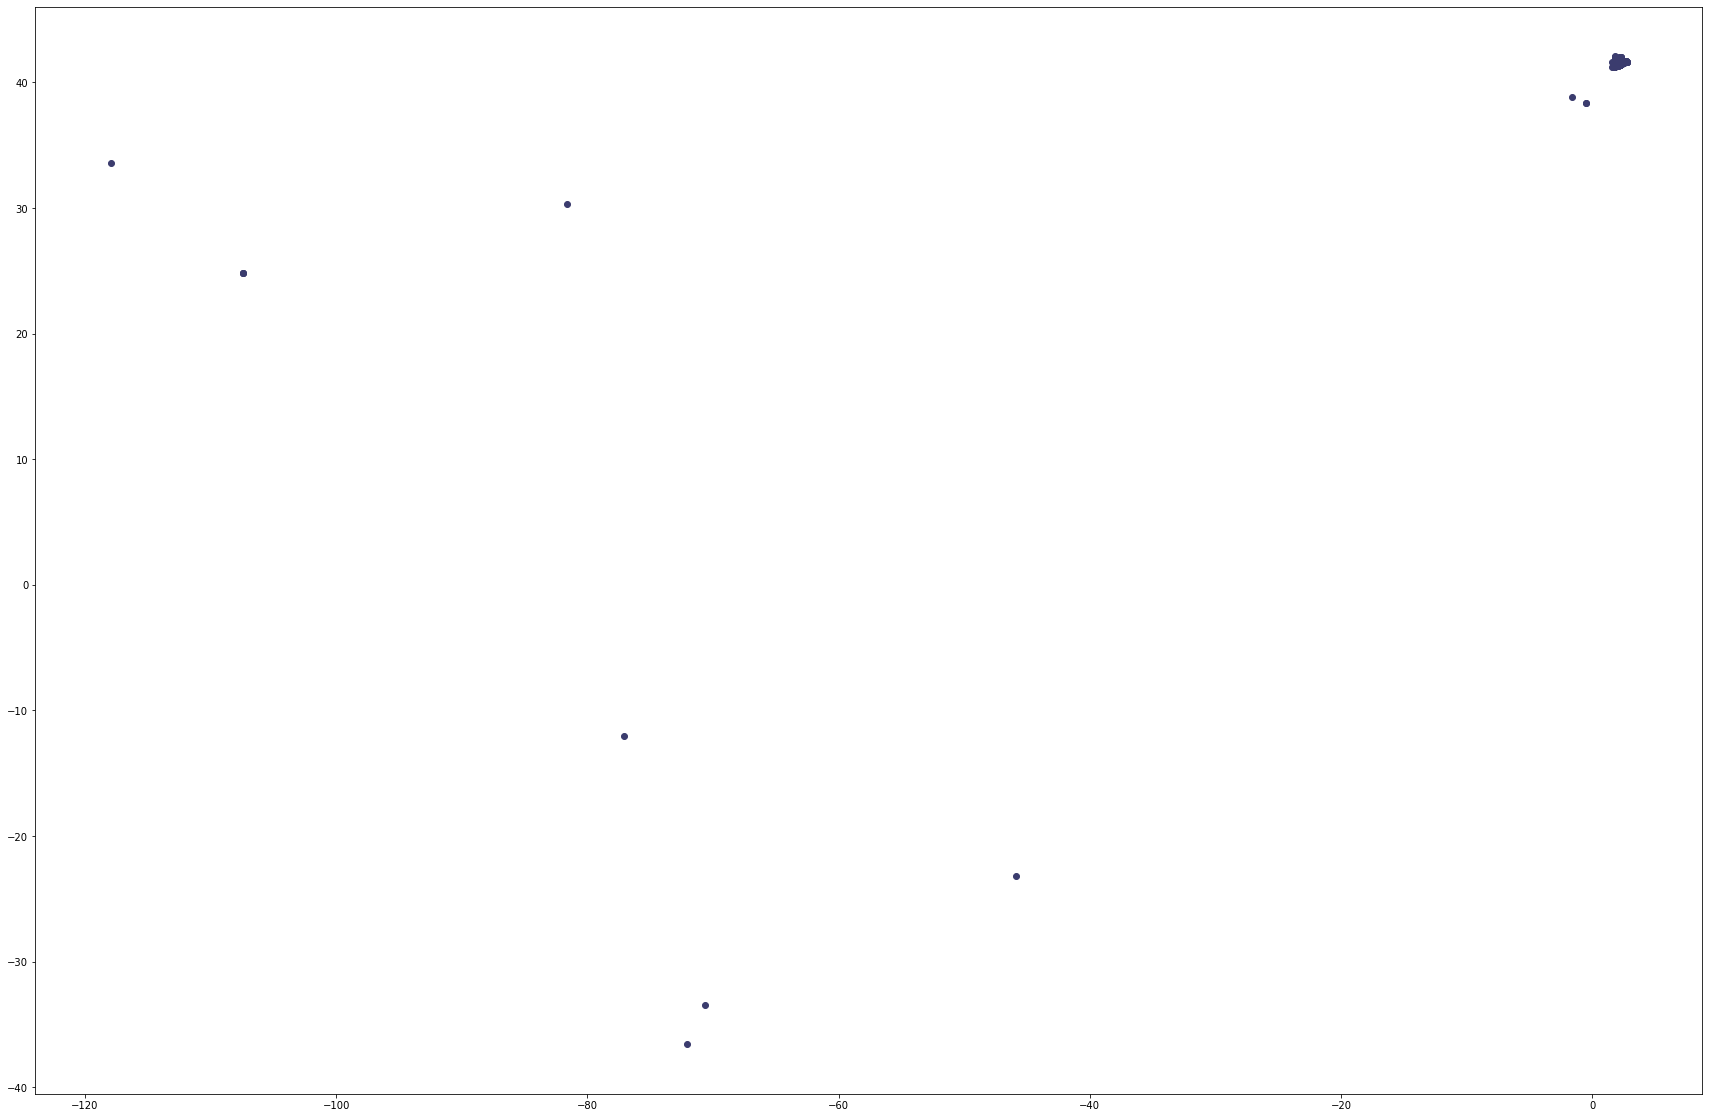

In [30]:
gdf.plot(figsize=(30,20), color='#3B3C6E')

In [31]:
import os
import folium

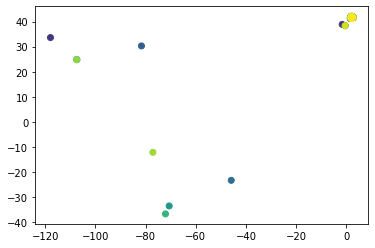

In [32]:
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg='4326')
ax = gdf.plot(cmap="viridis")

In [33]:
# plot map
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(barcelona_map)
barcelona_map

In [34]:
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='OpenStreetMap')
folium.GeoJson(gdf).add_to(barcelona_map)
barcelona_map

In [36]:
# import geopandas as gpd

# gdf2 = gpd.read_file('Neighborhoods_BCN.geojson')
# gdf2.to_file('Neighborhoods_BCN.shp')

In [39]:
rest

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
0,0,BelleBuon,2957,5.0,Travessera de Gràcia 441 Barcelona,Barcelona,41.411243,2.172947,POINT (2.17295 41.41124)
1,1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41 Barcelona,Barcelona,41.382567,2.163397,POINT (2.16340 41.38257)
2,2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,41.388800,2.166890,POINT (2.16689 41.38880)
3,3,La Peninsular,2875,4.5,Carrer Del Mar 29 Barcelona,Barcelona,41.380359,2.187872,POINT (2.18787 41.38036)
4,4,La Patsa Lab,1758,5.0,Carrer Casanova 94 Barcelona,Barcelona,41.386981,2.156921,POINT (2.15692 41.38698)
...,...,...,...,...,...,...,...,...,...
984,984,GOLIARD,320,4.5,Carrer PROGRES 6 Barcelona,Barcelona,42.016281,2.241467,POINT (2.24147 42.01628)
985,985,Locavore Barcelona,126,5.0,Carrer D aribau 151 Barcelona,Barcelona,41.392563,2.153457,POINT (2.15346 41.39256)
986,986,Cal Marius 449 #pastrami,249,4.0,Mallorca 449 Barcelona,Barcelona,41.405881,2.178473,POINT (2.17847 41.40588)
987,987,The Box,1085,4.5,Carrer D en Gignas 30 Barcelona,Barcelona,41.381411,2.180312,POINT (2.18031 41.38141)


In [40]:
rest.sort_values(by='number_reviews', ascending=False)

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
9,9,Cervecería Catalana,12767,4.5,Carrer de Mallorca 236 Barcelona,Barcelona,41.392403,2.160901,POINT (2.16090 41.39240)
2,2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,41.388800,2.166890,POINT (2.16689 41.38880)
26,26,7 Portes,8857,4.0,Passeig Isabel II 14 Barcelona,Barcelona,41.382263,2.183421,POINT (2.18342 41.38226)
80,80,Colom,7605,4.5,Escudellers 33 Barcelona,Barcelona,41.379825,2.176490,POINT (2.17649 41.37982)
94,94,La Fonda,6518,4.0,Carrer dels Escudellers 10 Barcelona,Barcelona,41.379360,2.176214,POINT (2.17621 41.37936)
...,...,...,...,...,...,...,...,...,...
944,944,Xoxo Barcelona,36,4.5,Carrer de la Riera de Sant Miquel 69 Barcelona,Barcelona,41.398565,2.154591,POINT (2.15459 41.39856)
943,943,Romantico Restaurant,26,4.5,Av de Sarrià 17 Barcelona,Barcelona,41.389902,2.146772,POINT (2.14677 41.38990)
937,937,Lamian Barcelona,23,4.5,Carrer Diputacio 294 Barcelona,Barcelona,41.440000,2.011828,POINT (2.01183 41.44000)
936,936,La Cazuela Barcelona,21,4.5,Tucumán 28 Barcelona,Barcelona,41.446558,2.202755,POINT (2.20275 41.44656)


In [41]:
rest.sort_values(by='lat', ascending=False)

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
804,804,Bruc33Tapas,1089,4.0,Carrer Bruc 33 Barcelona,Barcelona,42.096914,1.839039,POINT (1.83904 42.09691)
130,130,murivecchi,987,4.0,Carrer princesa 59 Barcelona,Barcelona,42.057701,2.261599,POINT (2.26160 42.05770)
858,858,Narciso,293,5.0,Carrer Princesa 9 Barcelona,Barcelona,42.057701,2.261599,POINT (2.26160 42.05770)
411,411,Pura Brasa Rambla,844,4.0,Rambla Catalunya 13 Barcelona,Barcelona,42.018251,2.242877,POINT (2.24288 42.01825)
583,583,El Racó - Rambla Catalunya,870,4.0,Rambla Catalunya 25 Barcelona,Barcelona,42.018251,2.242877,POINT (2.24288 42.01825)
...,...,...,...,...,...,...,...,...,...
926,926,Santa Tapa Barcelona,161,4.0,Carrer de la Piedad 8 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
946,946,"La Tagliatella C.C. Las Arenas, Barcelona",490,3.5,Carrer Gran Vía de les Corts Catalanes 373 38...,Barcelona,NaN,NaN,POINT EMPTY
955,955,La Cava Cakery,183,5.0,Psg Sant Joan 111 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
978,978,Dunnes Irish Bar Barcelona,663,4.0,Via Laietanna 19 Barcelona,Barcelona,NaN,NaN,POINT EMPTY


In [42]:
rest.sort_values(by='long', ascending=False)

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
889,889,Kame House Kitchen BCN,203,4.5,Carrer d Enric Granados 14 Barcelona,Barcelona,41.651972,2.743470,POINT (2.74347 41.65197)
68,68,Restaurant Etapes,1226,4.5,Enric Granados 10 Barcelona,Barcelona,41.652131,2.743185,POINT (2.74319 41.65213)
848,848,Futami,168,4.5,Enric Granados 10 Barcelona,Barcelona,41.652131,2.743185,POINT (2.74319 41.65213)
212,212,El Rincón,1297,4.5,Carrer del Carme 28 Barcelona,Barcelona,41.645784,2.741380,POINT (2.74138 41.64578)
433,433,L'Escamarlà,737,3.0,Passeig Maritim 40 Barcelona,Barcelona,41.638820,2.733315,POINT (2.73331 41.63882)
...,...,...,...,...,...,...,...,...,...
926,926,Santa Tapa Barcelona,161,4.0,Carrer de la Piedad 8 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
946,946,"La Tagliatella C.C. Las Arenas, Barcelona",490,3.5,Carrer Gran Vía de les Corts Catalanes 373 38...,Barcelona,NaN,NaN,POINT EMPTY
955,955,La Cava Cakery,183,5.0,Psg Sant Joan 111 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
978,978,Dunnes Irish Bar Barcelona,663,4.0,Via Laietanna 19 Barcelona,Barcelona,NaN,NaN,POINT EMPTY


In [43]:
rest_nulls = rest[rest.isna().any(axis=1)]

In [44]:
rest_nulls

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
37,37,L’ Amfora Barcelona,1940,4.5,Avenida del Parallel 184 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
40,40,Restaurante La Boqueria,2269,4.5,Carrer de la Boqueria Numero 17 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
57,57,La Carmelina,941,5.0,Av Litoral Nova Icaria 620 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
59,59,Pepito Restaurante,1427,4.5,Pasaje Domingo 3 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
64,64,Bacoa,1762,4.5,Ronda Universidad 31 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
...,...,...,...,...,...,...,...,...,...
926,926,Santa Tapa Barcelona,161,4.0,Carrer de la Piedad 8 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
946,946,"La Tagliatella C.C. Las Arenas, Barcelona",490,3.5,Carrer Gran Vía de les Corts Catalanes 373 38...,Barcelona,NaN,NaN,POINT EMPTY
955,955,La Cava Cakery,183,5.0,Psg Sant Joan 111 Barcelona,Barcelona,NaN,NaN,POINT EMPTY
978,978,Dunnes Irish Bar Barcelona,663,4.0,Via Laietanna 19 Barcelona,Barcelona,NaN,NaN,POINT EMPTY


In [45]:
rest_nulls['lat'].isna().sum()

95

In [46]:
rest_nulls.to_csv('nulls.csv',encoding='utf-8-sig')

In [54]:
rest2=rest
pd.set_option('display.max_rows', None)
rest2.dropna(inplace=True)
rest2

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
0,0,BelleBuon,2957,5.0,Travessera de Gràcia 441 Barcelona,Barcelona,41.411243,2.172947,POINT (2.17295 41.41124)
1,1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41 Barcelona,Barcelona,41.382567,2.163397,POINT (2.16340 41.38257)
2,2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,41.388800,2.166890,POINT (2.16689 41.38880)
3,3,La Peninsular,2875,4.5,Carrer Del Mar 29 Barcelona,Barcelona,41.380359,2.187872,POINT (2.18787 41.38036)
4,4,La Patsa Lab,1758,5.0,Carrer Casanova 94 Barcelona,Barcelona,41.386981,2.156921,POINT (2.15692 41.38698)
5,5,Bella Italia,1384,5.0,Carrer de Roger de Lluria 87 Barcelona,Barcelona,41.395029,2.166052,POINT (2.16605 41.39503)
6,6,Thai Barcelona | Royal Cuisine,1654,4.0,Diputació 273 Barcelona,Barcelona,41.403974,1.699434,POINT (1.69943 41.40397)
7,7,Ramen-ya Hiro,1212,4.5,Carrer Girona 164 Barcelona,Barcelona,41.653875,2.444301,POINT (2.44430 41.65387)
8,8,Le Romane,2205,5.0,Carrer Muntaner 103 Barcelona,Barcelona,41.388797,2.156331,POINT (2.15633 41.38880)
9,9,Cervecería Catalana,12767,4.5,Carrer de Mallorca 236 Barcelona,Barcelona,41.392403,2.160901,POINT (2.16090 41.39240)


In [55]:
rest2['lat'].isna().sum()

0

In [57]:
rest2.count()

Unnamed: 0        894
name              894
number_reviews    894
rating            894
address           894
city              894
lat               894
long              894
geometry          894
dtype: int64